# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:25:46.144807: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:25:48.952132
2025-04-14 20:25:48.952132


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:25:44"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

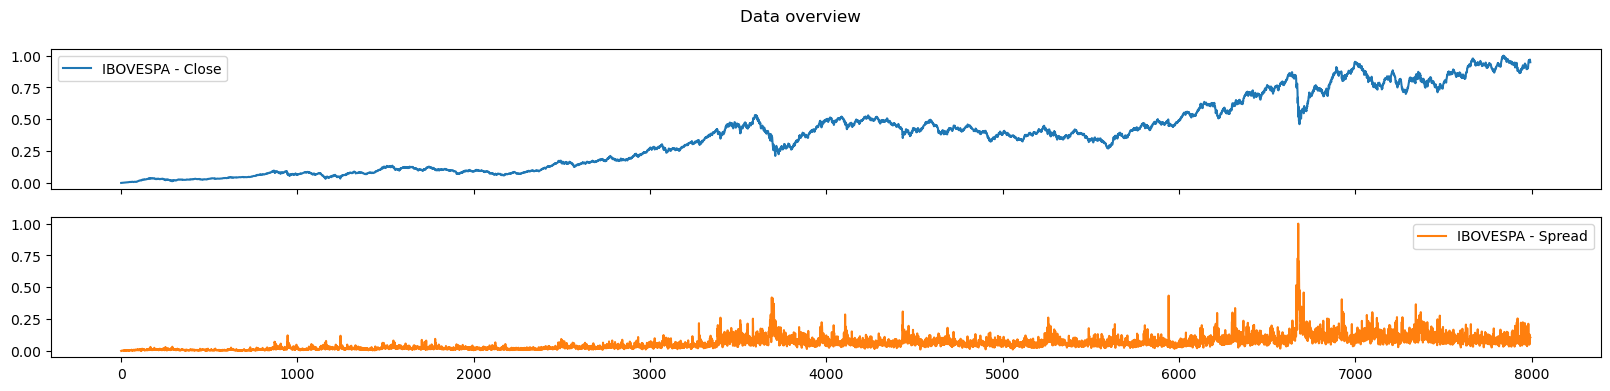

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

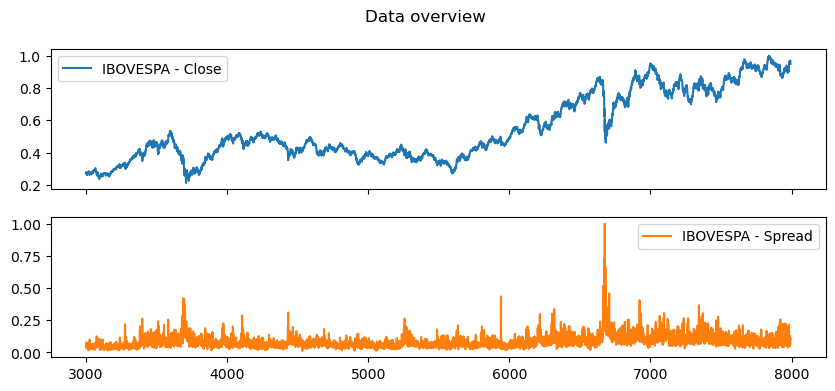

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

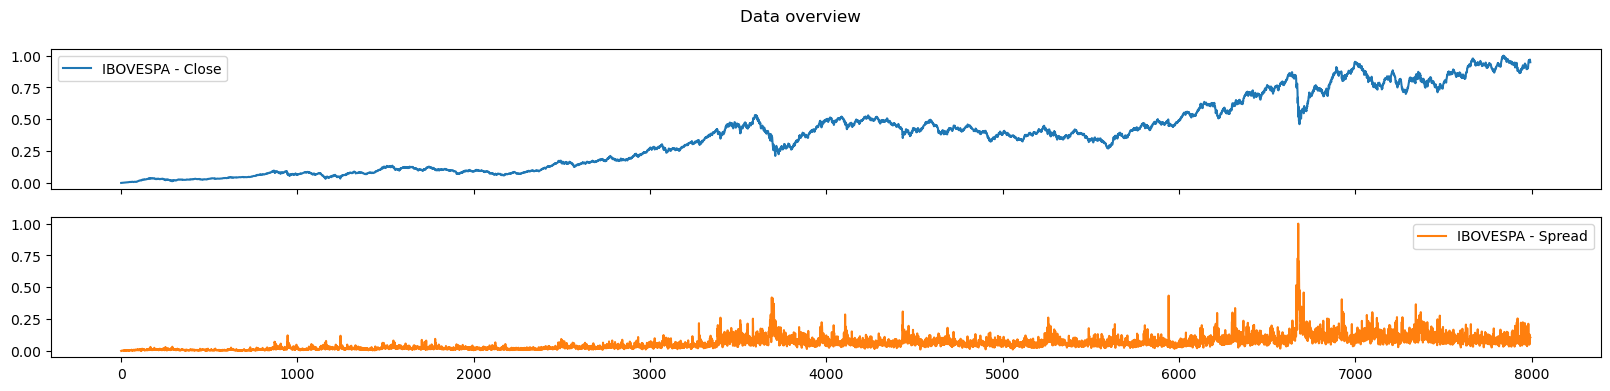

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

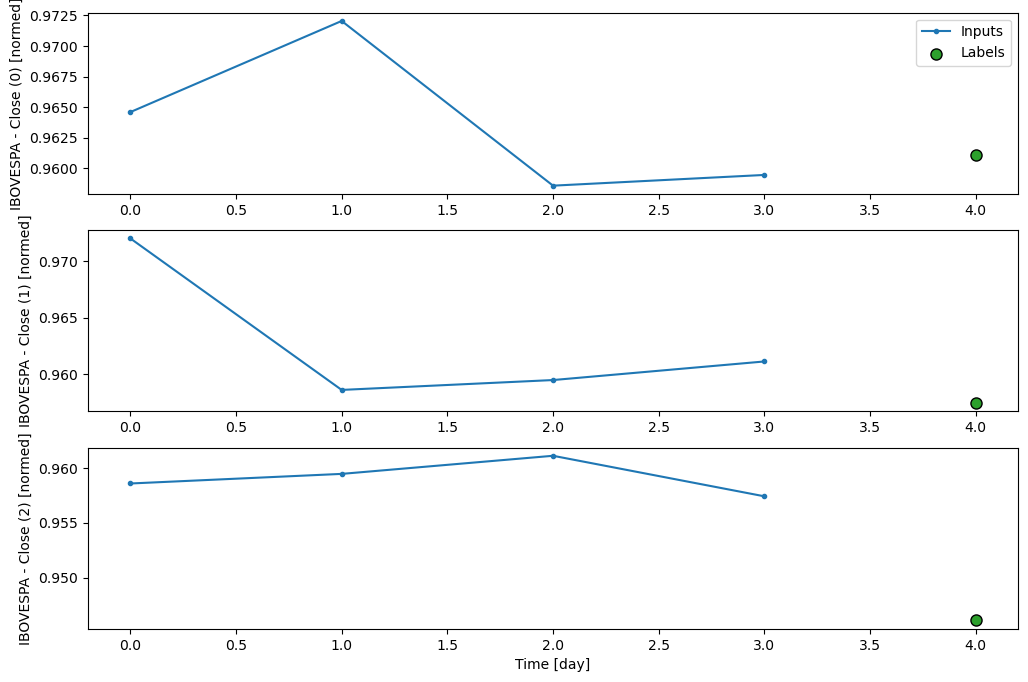

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:05 2s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 53.9666 - mean_squared_error: 2.8417e-05 - root_mean_squared_error: 0.0052  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.1060 - mean_squared_error: 3.3243e-05 - root_mean_squared_error: 0.0056

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.6882 - mean_squared_error: 3.3830e-05 - root_mean_squared_error: 0.0057

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 33.4789 - mean_squared_error: 4.6684e-05 - root_mean_squared_error: 0.0066

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 30.8945 - mean_squared_error: 7.1023e-05 - root_mean_squared_error: 0.0079

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.5651 - mean_squared_error: 1.0303e-04 - root_mean_squared_error: 0.0093

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.4956 - mean_squared_error: 1.3352e-04 - root_mean_squared_error: 0.0105

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.4891 - mean_squared_error: 1.5796e-04 - root_mean_squared_error: 0.0115

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 26.7621 - mean_squared_error: 1.7613e-04 - root_mean_squared_error: 0.0122

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 26.1111 - mean_squared_error: 2.0213e-04 - root_mean_squared_error: 0.0131

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 25.5526 - mean_squared_error: 2.2517e-04 - root_mean_squared_error: 0.0139

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 25.0154 - mean_squared_error: 2.7879e-04 - root_mean_squared_error: 0.0152

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 24.5926 - mean_squared_error: 3.5004e-04 - root_mean_squared_error: 0.0167

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 24.2332 - mean_squared_error: 4.9012e-04 - root_mean_squared_error: 0.0189

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 24.0023 - mean_squared_error: 6.9747e-04 - root_mean_squared_error: 0.0217

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 23.7678 - mean_squared_error: 9.1832e-04 - root_mean_squared_error: 0.0245

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 23.5444 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0266    

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 23.3036 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0288

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 23.0812 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0304

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 22.8449 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0321

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 22.6270 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0336

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 22.4290 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0349

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 22.2297 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 22.0237 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0376

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 21.8174 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0390

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 21.6917 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0398 - val_loss: 0.0879 - val_mean_absolute_error: 0.0879 - val_mean_absolute_percentage_error: 9.3658 - val_mean_squared_error: 0.0089 - val_root_mean_squared_error: 0.0945 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6823 - mean_absolute_error: 0.6823 - mean_absolute_percentage_error: 32013.5977 - mean_squared_error: 0.4656 - root_mean_squared_error: 0.6823

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6545 - mean_absolute_error: 0.6545 - mean_absolute_percentage_error: 13179.3447 - mean_squared_error: 0.4304 - root_mean_squared_error: 0.6556 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5893 - mean_absolute_error: 0.5893 - mean_absolute_percentage_error: 9488.6475 - mean_squared_error: 0.3679 - root_mean_squared_error: 0.6029 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5224 - mean_absolute_error: 0.5224 - mean_absolute_percentage_error: 7735.6909 - mean_squared_error: 0.3185 - root_mean_squared_error: 0.5564

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4529 - mean_absolute_error: 0.4529 - mean_absolute_percentage_error: 6315.4214 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.5082

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4008 - mean_absolute_error: 0.4008 - mean_absolute_percentage_error: 5375.4629 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4704

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 4638.5112 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4372

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 4143.9717 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4128

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 3754.1345 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3922

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 3437.9675 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3746

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 3149.3076 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3576

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 2931.7795 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3442

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 2745.0916 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3323

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 2582.9448 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3217

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 2440.7966 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3123

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 2314.9287 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3037

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 2190.8638 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2950

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 2091.0955 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2878

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 1991.3464 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2805

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 1910.1156 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2743

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 1828.0077 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2680

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 1760.4879 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2627

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 1691.6229 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2572

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 1634.5095 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2526

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 1581.4884 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2483

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 1532.1158 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2442

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 1481.0863 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2400 - val_loss: 0.0434 - val_mean_absolute_error: 0.0434 - val_mean_absolute_percentage_error: 4.6163 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0485 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4507 - mean_absolute_error: 0.4507 - mean_absolute_percentage_error: 21141.3359 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4507

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 8705.8975 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4352  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - mean_absolute_percentage_error: 6058.9077 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3954

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 4628.4263 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3537

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 3856.9709 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3250

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 3325.8577 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.3024

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 2898.1326 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2821

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 2605.5164 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2671

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 2348.6946 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2530

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 2161.1809 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2422

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 1988.2227 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2317

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 1856.7876 - mean_squared_error: 0.0585 - root_mean_squared_error: 0.2234

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 1731.5448 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2152

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 1633.7416 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2086

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 1538.4098 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2019

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 1462.4968 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.1964

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 1408.9187 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1925

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 1346.0640 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1878

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 1283.0767 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1829

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 1231.6737 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1789

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1184.5984 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1751

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 1141.3085 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1716

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 1097.1013 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1679

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1060.4070 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1648

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 1022.6721 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1616

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 991.1420 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1589 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 971.2866 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1572 - val_loss: 0.0377 - val_mean_absolute_error: 0.0377 - val_mean_absolute_percentage_error: 4.0303 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0403 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 2665.6218 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 907.4921 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 627.1348 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 483.5578 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 406.1226 - mean_squared_error: 9.9725e-04 - root_mean_squared_error: 0.0308

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 348.0761 - mean_squared_error: 9.1203e-04 - root_mean_squared_error: 0.0295

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 309.9173 - mean_squared_error: 8.4980e-04 - root_mean_squared_error: 0.0284

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 277.2827 - mean_squared_error: 7.9014e-04 - root_mean_squared_error: 0.0273

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 253.9461 - mean_squared_error: 7.4380e-04 - root_mean_squared_error: 0.0264

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 234.6579 - mean_squared_error: 7.0323e-04 - root_mean_squared_error: 0.0256

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 218.3946 - mean_squared_error: 6.6728e-04 - root_mean_squared_error: 0.0249

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 204.4713 - mean_squared_error: 6.3545e-04 - root_mean_squared_error: 0.0243

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 192.4029 - mean_squared_error: 6.0751e-04 - root_mean_squared_error: 0.0237

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 180.7445 - mean_squared_error: 5.8135e-04 - root_mean_squared_error: 0.0231

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 171.5351 - mean_squared_error: 5.6169e-04 - root_mean_squared_error: 0.0227

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 162.4655 - mean_squared_error: 5.4293e-04 - root_mean_squared_error: 0.0223

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 155.1784 - mean_squared_error: 5.2817e-04 - root_mean_squared_error: 0.0220

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 147.8971 - mean_squared_error: 5.1336e-04 - root_mean_squared_error: 0.0217

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 141.9663 - mean_squared_error: 5.0084e-04 - root_mean_squared_error: 0.0214

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 136.5430 - mean_squared_error: 4.8898e-04 - root_mean_squared_error: 0.0212

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 131.0337 - mean_squared_error: 4.7655e-04 - root_mean_squared_error: 0.0209

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 126.4813 - mean_squared_error: 4.6600e-04 - root_mean_squared_error: 0.0207

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 121.8196 - mean_squared_error: 4.5523e-04 - root_mean_squared_error: 0.0204

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 117.9434 - mean_squared_error: 4.4777e-04 - root_mean_squared_error: 0.0203

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 114.3358 - mean_squared_error: 4.4243e-04 - root_mean_squared_error: 0.0202

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 110.9671 - mean_squared_error: 4.3778e-04 - root_mean_squared_error: 0.0201

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 109.5410 - mean_squared_error: 4.3587e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.2218 - val_mean_squared_error: 1.8145e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 2502.9226 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0534

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 1134.9629 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 711.2650 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 544.0456 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 447.7288 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 384.0077 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 333.7571 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 299.6851 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 269.9485 - mean_squared_error: 9.3118e-04 - root_mean_squared_error: 0.0297

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 248.3291 - mean_squared_error: 8.7305e-04 - root_mean_squared_error: 0.0287

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 228.4469 - mean_squared_error: 8.1737e-04 - root_mean_squared_error: 0.0276

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 213.3671 - mean_squared_error: 7.7373e-04 - root_mean_squared_error: 0.0268

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 200.3582 - mean_squared_error: 7.3529e-04 - root_mean_squared_error: 0.0260

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 189.0128 - mean_squared_error: 7.0191e-04 - root_mean_squared_error: 0.0253

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 179.0312 - mean_squared_error: 6.7360e-04 - root_mean_squared_error: 0.0248

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 170.1717 - mean_squared_error: 6.4971e-04 - root_mean_squared_error: 0.0243

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 162.2433 - mean_squared_error: 6.2837e-04 - root_mean_squared_error: 0.0239

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 155.0998 - mean_squared_error: 6.0883e-04 - root_mean_squared_error: 0.0235

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 147.9449 - mean_squared_error: 5.8893e-04 - root_mean_squared_error: 0.0231

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 141.4909 - mean_squared_error: 5.7065e-04 - root_mean_squared_error: 0.0227

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 136.2007 - mean_squared_error: 5.5567e-04 - root_mean_squared_error: 0.0224

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 130.8195 - mean_squared_error: 5.4045e-04 - root_mean_squared_error: 0.0221

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 126.3681 - mean_squared_error: 5.2815e-04 - root_mean_squared_error: 0.0218

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 121.8037 - mean_squared_error: 5.1600e-04 - root_mean_squared_error: 0.0216

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 118.0014 - mean_squared_error: 5.0685e-04 - root_mean_squared_error: 0.0214

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 114.0762 - mean_squared_error: 4.9780e-04 - root_mean_squared_error: 0.0212

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 111.1406 - mean_squared_error: 4.9106e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9268 - val_mean_squared_error: 1.1738e-04 - val_root_mean_squared_error: 0.0108 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 3398.9512 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0724

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 1302.3688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 880.8428 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 682.4620 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 563.6880 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 483.6758 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 419.9925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 376.7254 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 338.9618 - mean_squared_error: 9.9585e-04 - root_mean_squared_error: 0.0291

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 311.5078 - mean_squared_error: 9.2134e-04 - root_mean_squared_error: 0.0278

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 286.2692 - mean_squared_error: 8.5233e-04 - root_mean_squared_error: 0.0266

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 265.1875 - mean_squared_error: 7.9440e-04 - root_mean_squared_error: 0.0256

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 248.9513 - mean_squared_error: 7.4980e-04 - root_mean_squared_error: 0.0248

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 234.7793 - mean_squared_error: 7.1125e-04 - root_mean_squared_error: 0.0240

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 224.9344 - mean_squared_error: 6.8455e-04 - root_mean_squared_error: 0.0235

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 213.5425 - mean_squared_error: 6.5362e-04 - root_mean_squared_error: 0.0230

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 202.2946 - mean_squared_error: 6.2334e-04 - root_mean_squared_error: 0.0224

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 193.2370 - mean_squared_error: 5.9918e-04 - root_mean_squared_error: 0.0219

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 184.1692 - mean_squared_error: 5.7491e-04 - root_mean_squared_error: 0.0214

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 176.7776 - mean_squared_error: 5.5521e-04 - root_mean_squared_error: 0.0210

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 169.3001 - mean_squared_error: 5.3551e-04 - root_mean_squared_error: 0.0206

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 163.1455 - mean_squared_error: 5.1958e-04 - root_mean_squared_error: 0.0203

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 157.4686 - mean_squared_error: 5.0554e-04 - root_mean_squared_error: 0.0201

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 152.7772 - mean_squared_error: 4.9427e-04 - root_mean_squared_error: 0.0198

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 147.8560 - mean_squared_error: 4.8287e-04 - root_mean_squared_error: 0.0196

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 143.2727 - mean_squared_error: 4.7247e-04 - root_mean_squared_error: 0.0194

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 138.9937 - mean_squared_error: 4.6291e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8427 - val_mean_squared_error: 9.5651e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 4999.4277 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1066

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 1854.8364 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0842 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 1336.6993 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0745

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 1039.2640 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0666

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 859.5765 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0607 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 737.9796 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 649.4794 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0527

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 575.2302 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 522.9258 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 475.9569 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 441.0235 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 411.3436 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 385.7770 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 363.5004 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 341.8698 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 324.6963 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 307.7174 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 294.0276 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 280.3097 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 269.1171 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 257.7817 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 248.4420 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 239.8186 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 231.8317 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 223.6210 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 216.7618 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 212.4429 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2389 - val_mean_squared_error: 1.9207e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 4499.9805 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 1667.3009 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0754 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 1158.2814 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 886.0798 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0572 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 739.4650 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0523

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 638.4438 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 564.0158 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 501.0370 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 456.3272 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 419.6492 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 388.9545 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 360.1863 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 338.0377 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 318.7215 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 301.7184 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 285.0357 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 271.6715 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 258.3556 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 246.4036 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 236.6430 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 226.7514 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 218.5957 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 211.0606 - mean_squared_error: 9.8265e-04 - root_mean_squared_error: 0.0279

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 204.0758 - mean_squared_error: 9.5530e-04 - root_mean_squared_error: 0.0275

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 197.5810 - mean_squared_error: 9.2985e-04 - root_mean_squared_error: 0.0271

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 191.5248 - mean_squared_error: 9.0610e-04 - root_mean_squared_error: 0.0267

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 188.3346 - mean_squared_error: 8.9359e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6662 - val_mean_squared_error: 5.8056e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 4225.9712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 1651.5020 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 1087.4904 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 854.6747 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0549 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 699.0787 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 604.6586 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 534.9387 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 481.0796 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 433.8989 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 399.4571 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 367.6599 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 343.4828 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 326.9823 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 306.2451 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 289.9309 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 273.9219 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 261.0985 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 248.3196 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 237.9435 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 227.4827 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 218.8988 - mean_squared_error: 9.6943e-04 - root_mean_squared_error: 0.0279

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 210.1610 - mean_squared_error: 9.3503e-04 - root_mean_squared_error: 0.0274

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 202.9286 - mean_squared_error: 9.0652e-04 - root_mean_squared_error: 0.0269

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 195.5095 - mean_squared_error: 8.7742e-04 - root_mean_squared_error: 0.0264

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 189.3250 - mean_squared_error: 8.5326e-04 - root_mean_squared_error: 0.0260

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 182.9393 - mean_squared_error: 8.2837e-04 - root_mean_squared_error: 0.0256

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 180.5171 - mean_squared_error: 8.1895e-04 - root_mean_squared_error: 0.0255 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7048 - val_mean_squared_error: 6.4443e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 3880.1724 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0826

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 1514.8071 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 999.1561 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 785.2213 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0505

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 642.3276 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 555.5154 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 485.2517 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 436.9811 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 394.5034 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 363.4102 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 334.6722 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 312.8008 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 291.9344 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 275.6310 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 261.2282 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 248.3981 - mean_squared_error: 9.8640e-04 - root_mean_squared_error: 0.0284

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 236.8886 - mean_squared_error: 9.4565e-04 - root_mean_squared_error: 0.0277

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 226.4984 - mean_squared_error: 9.0863e-04 - root_mean_squared_error: 0.0271

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 216.0721 - mean_squared_error: 8.7125e-04 - root_mean_squared_error: 0.0265

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 207.5538 - mean_squared_error: 8.4055e-04 - root_mean_squared_error: 0.0260

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 198.9177 - mean_squared_error: 8.0934e-04 - root_mean_squared_error: 0.0255

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 191.7946 - mean_squared_error: 7.8351e-04 - root_mean_squared_error: 0.0250

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 185.2118 - mean_squared_error: 7.5964e-04 - root_mean_squared_error: 0.0246

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 179.1087 - mean_squared_error: 7.3770e-04 - root_mean_squared_error: 0.0242

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 173.4326 - mean_squared_error: 7.1739e-04 - root_mean_squared_error: 0.0238

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 169.2845 - mean_squared_error: 7.0262e-04 - root_mean_squared_error: 0.0236

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 165.3504 - mean_squared_error: 6.8867e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6468 - val_mean_squared_error: 5.5935e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 3590.0857 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0764

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 1324.8206 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 924.3342 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 709.8593 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 593.7363 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 513.3982 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 448.4329 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 399.5096 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 361.2261 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 333.1305 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 307.1039 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 285.2272 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 266.5486 - mean_squared_error: 9.6447e-04 - root_mean_squared_error: 0.0283

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 251.9158 - mean_squared_error: 9.1673e-04 - root_mean_squared_error: 0.0275

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 238.9603 - mean_squared_error: 8.7450e-04 - root_mean_squared_error: 0.0268

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 227.3990 - mean_squared_error: 8.3673e-04 - root_mean_squared_error: 0.0262

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 215.9232 - mean_squared_error: 7.9921e-04 - root_mean_squared_error: 0.0255

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 206.6360 - mean_squared_error: 7.6867e-04 - root_mean_squared_error: 0.0250

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 197.3006 - mean_squared_error: 7.3791e-04 - root_mean_squared_error: 0.0244

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 189.6609 - mean_squared_error: 7.1265e-04 - root_mean_squared_error: 0.0240

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 181.9026 - mean_squared_error: 6.8688e-04 - root_mean_squared_error: 0.0235

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 175.4945 - mean_squared_error: 6.6555e-04 - root_mean_squared_error: 0.0231

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 168.9339 - mean_squared_error: 6.4386e-04 - root_mean_squared_error: 0.0227

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 162.8929 - mean_squared_error: 6.2422e-04 - root_mean_squared_error: 0.0223

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 157.8486 - mean_squared_error: 6.0791e-04 - root_mean_squared_error: 0.0220

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 153.1382 - mean_squared_error: 5.9277e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7550 - val_mean_squared_error: 7.3070e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 3366.6990 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0717

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 1308.6798 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 858.0439 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 671.7507 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 547.9891 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 466.5310 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 408.1967 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 364.0728 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 332.5198 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 303.8809 - mean_squared_error: 9.3991e-04 - root_mean_squared_error: 0.0280

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 286.8811 - mean_squared_error: 8.9099e-04 - root_mean_squared_error: 0.0272

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 267.8928 - mean_squared_error: 8.3606e-04 - root_mean_squared_error: 0.0262

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 251.4951 - mean_squared_error: 7.8854e-04 - root_mean_squared_error: 0.0254

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 237.1806 - mean_squared_error: 7.4738e-04 - root_mean_squared_error: 0.0246

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 224.5644 - mean_squared_error: 7.1135e-04 - root_mean_squared_error: 0.0240

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 213.3500 - mean_squared_error: 6.7945e-04 - root_mean_squared_error: 0.0234

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 203.3102 - mean_squared_error: 6.5103e-04 - root_mean_squared_error: 0.0228

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 193.3117 - mean_squared_error: 6.2269e-04 - root_mean_squared_error: 0.0223

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 185.1976 - mean_squared_error: 5.9960e-04 - root_mean_squared_error: 0.0218

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 177.0221 - mean_squared_error: 5.7640e-04 - root_mean_squared_error: 0.0214

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 170.3165 - mean_squared_error: 5.5734e-04 - root_mean_squared_error: 0.0210

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 163.4936 - mean_squared_error: 5.3796e-04 - root_mean_squared_error: 0.0206

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 157.8494 - mean_squared_error: 5.2220e-04 - root_mean_squared_error: 0.0203

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 152.0633 - mean_squared_error: 5.0681e-04 - root_mean_squared_error: 0.0200

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 147.2435 - mean_squared_error: 4.9484e-04 - root_mean_squared_error: 0.0198

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 142.2688 - mean_squared_error: 4.8276e-04 - root_mean_squared_error: 0.0195

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 140.3821 - mean_squared_error: 4.7819e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1863 - val_mean_squared_error: 1.6863e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 4211.0732 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 1659.5815 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 1087.7765 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 851.2575 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0550 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 694.3742 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 599.5406 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 558.3644 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 543.6186 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 523.0769 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 504.2101 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 486.8106 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 451.0122 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 420.6557 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 405.2678 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 391.0854 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 371.7701 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 349.0897 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 331.6208 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 313.8876 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 301.9118 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 290.9180 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 282.4164 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 272.9181 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 265.5275 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 254.5842 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 245.7952 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 238.7785 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 231.1332 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 223.0333 - mean_squared_error: 9.9364e-04 - root_mean_squared_error: 0.0283

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 215.5419 - mean_squared_error: 9.6683e-04 - root_mean_squared_error: 0.0279

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 209.4299 - mean_squared_error: 9.4506e-04 - root_mean_squared_error: 0.0275

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 202.8973 - mean_squared_error: 9.2179e-04 - root_mean_squared_error: 0.0272

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 199.0376 - mean_squared_error: 9.0796e-04 - root_mean_squared_error: 0.0270

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 193.8999 - mean_squared_error: 8.9019e-04 - root_mean_squared_error: 0.0267

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 188.3776 - mean_squared_error: 8.7225e-04 - root_mean_squared_error: 0.0265

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 185.1002 - mean_squared_error: 8.6214e-04 - root_mean_squared_error: 0.0264

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 182.5677 - mean_squared_error: 8.5436e-04 - root_mean_squared_error: 0.0263

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 179.5080 - mean_squared_error: 8.4506e-04 - root_mean_squared_error: 0.0261

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 177.7273 - mean_squared_error: 8.3966e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 1.7261 - val_mean_squared_error: 3.2754e-04 - val_root_mean_squared_error: 0.0181 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 5827.8765 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1241

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 3357.2390 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1186

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 1999.4126 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1018 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 1486.8265 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0900

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 1232.1367 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0826

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 1039.3495 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0762

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 904.2265 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0711 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 803.3693 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 733.6567 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0640

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 668.8413 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0610

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 621.7632 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 603.7761 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 571.0748 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 533.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 504.2498 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 475.2014 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 452.6595 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 429.6324 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 411.5089 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 404.2488 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 386.2041 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 369.8527 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0445

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 360.3869 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 349.7103 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 341.3316 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 333.3842 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 321.4828 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 311.8105 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 302.7577 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 294.2646 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 285.1775 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 279.8047 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 273.6444 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 266.8235 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 260.3661 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 254.2428 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 252.5527 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6367 - val_mean_squared_error: 5.4087e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 2465.0503 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 950.6790 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 646.8682 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 504.5437 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 418.6615 - mean_squared_error: 9.1277e-04 - root_mean_squared_error: 0.0291

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 354.8108 - mean_squared_error: 7.9646e-04 - root_mean_squared_error: 0.0269

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 313.4246 - mean_squared_error: 7.1694e-04 - root_mean_squared_error: 0.0254

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 278.4525 - mean_squared_error: 6.4716e-04 - root_mean_squared_error: 0.0240

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 253.6653 - mean_squared_error: 5.9626e-04 - root_mean_squared_error: 0.0229

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 231.3096 - mean_squared_error: 5.4937e-04 - root_mean_squared_error: 0.0219

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 214.6293 - mean_squared_error: 5.1385e-04 - root_mean_squared_error: 0.0210

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 198.9747 - mean_squared_error: 4.8026e-04 - root_mean_squared_error: 0.0203

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 186.9052 - mean_squared_error: 4.5438e-04 - root_mean_squared_error: 0.0196

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 175.2733 - mean_squared_error: 4.2991e-04 - root_mean_squared_error: 0.0190

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 166.1015 - mean_squared_error: 4.1093e-04 - root_mean_squared_error: 0.0186

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 157.9359 - mean_squared_error: 3.9407e-04 - root_mean_squared_error: 0.0182

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 150.6144 - mean_squared_error: 3.7893e-04 - root_mean_squared_error: 0.0178

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 144.7096 - mean_squared_error: 3.6663e-04 - root_mean_squared_error: 0.0175

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 139.9478 - mean_squared_error: 3.5662e-04 - root_mean_squared_error: 0.0172

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 135.5213 - mean_squared_error: 3.4729e-04 - root_mean_squared_error: 0.0170

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 130.8277 - mean_squared_error: 3.3735e-04 - root_mean_squared_error: 0.0167

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 127.0068 - mean_squared_error: 3.2925e-04 - root_mean_squared_error: 0.0165

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 122.9317 - mean_squared_error: 3.2061e-04 - root_mean_squared_error: 0.0163

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 120.5287 - mean_squared_error: 3.1555e-04 - root_mean_squared_error: 0.0161

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 116.8930 - mean_squared_error: 3.0797e-04 - root_mean_squared_error: 0.0159

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 114.7420 - mean_squared_error: 3.0371e-04 - root_mean_squared_error: 0.0158

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 113.0836 - mean_squared_error: 3.0052e-04 - root_mean_squared_error: 0.0158

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 109.9215 - mean_squared_error: 2.9466e-04 - root_mean_squared_error: 0.0156

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 107.3114 - mean_squared_error: 2.8999e-04 - root_mean_squared_error: 0.0155

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 104.8358 - mean_squared_error: 2.8563e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8522 - val_mean_squared_error: 9.7850e-05 - val_root_mean_squared_error: 0.0099 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 3022.9070 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0644

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 1341.1726 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 928.3433 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 729.4724 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 622.2615 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 524.3209 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 455.7476 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 410.3224 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 393.8086 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 360.5056 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 329.3803 - mean_squared_error: 9.2999e-04 - root_mean_squared_error: 0.0283

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 306.6754 - mean_squared_error: 8.7063e-04 - root_mean_squared_error: 0.0272

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 289.8127 - mean_squared_error: 8.2616e-04 - root_mean_squared_error: 0.0264

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 272.5685 - mean_squared_error: 7.8035e-04 - root_mean_squared_error: 0.0256

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 253.4770 - mean_squared_error: 7.2924e-04 - root_mean_squared_error: 0.0246

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 237.1298 - mean_squared_error: 6.8524e-04 - root_mean_squared_error: 0.0237

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 221.5002 - mean_squared_error: 6.4330e-04 - root_mean_squared_error: 0.0229

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 209.2635 - mean_squared_error: 6.1067e-04 - root_mean_squared_error: 0.0222

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 197.3065 - mean_squared_error: 5.7875e-04 - root_mean_squared_error: 0.0216

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 187.7644 - mean_squared_error: 5.5322e-04 - root_mean_squared_error: 0.0210

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 179.1895 - mean_squared_error: 5.3027e-04 - root_mean_squared_error: 0.0205

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 171.4371 - mean_squared_error: 5.0947e-04 - root_mean_squared_error: 0.0201

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 163.6474 - mean_squared_error: 4.8854e-04 - root_mean_squared_error: 0.0196

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 157.2754 - mean_squared_error: 4.7140e-04 - root_mean_squared_error: 0.0193

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 151.4286 - mean_squared_error: 4.5573e-04 - root_mean_squared_error: 0.0189

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 146.0422 - mean_squared_error: 4.4137e-04 - root_mean_squared_error: 0.0186

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 141.0626 - mean_squared_error: 4.2831e-04 - root_mean_squared_error: 0.0183

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 136.4458 - mean_squared_error: 4.1699e-04 - root_mean_squared_error: 0.0180

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 132.1516 - mean_squared_error: 4.0702e-04 - root_mean_squared_error: 0.0178

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 127.7169 - mean_squared_error: 3.9693e-04 - root_mean_squared_error: 0.0176

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 126.8699 - mean_squared_error: 3.9500e-04 - root_mean_squared_error: 0.0176 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8228 - val_mean_squared_error: 8.9655e-05 - val_root_mean_squared_error: 0.0095 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 2477.3901 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 907.5026 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 625.5705 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 488.0222 - mean_squared_error: 9.7562e-04 - root_mean_squared_error: 0.0297

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 404.3137 - mean_squared_error: 8.2182e-04 - root_mean_squared_error: 0.0269

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 347.4061 - mean_squared_error: 7.1426e-04 - root_mean_squared_error: 0.0249

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 305.9113 - mean_squared_error: 6.3473e-04 - root_mean_squared_error: 0.0233

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 274.1644 - mean_squared_error: 5.7325e-04 - root_mean_squared_error: 0.0219

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 251.5513 - mean_squared_error: 5.2903e-04 - root_mean_squared_error: 0.0210

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 232.7449 - mean_squared_error: 4.9195e-04 - root_mean_squared_error: 0.0201

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 218.6810 - mean_squared_error: 4.6410e-04 - root_mean_squared_error: 0.0195

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 206.3867 - mean_squared_error: 4.3968e-04 - root_mean_squared_error: 0.0189

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 192.6664 - mean_squared_error: 4.1244e-04 - root_mean_squared_error: 0.0182

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 180.8277 - mean_squared_error: 3.8913e-04 - root_mean_squared_error: 0.0176

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 170.5004 - mean_squared_error: 3.6923e-04 - root_mean_squared_error: 0.0171

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 161.4044 - mean_squared_error: 3.5205e-04 - root_mean_squared_error: 0.0167

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 153.3220 - mean_squared_error: 3.3689e-04 - root_mean_squared_error: 0.0163

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 145.3309 - mean_squared_error: 3.2201e-04 - root_mean_squared_error: 0.0160

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 138.2092 - mean_squared_error: 3.0870e-04 - root_mean_squared_error: 0.0156

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 132.4282 - mean_squared_error: 2.9789e-04 - root_mean_squared_error: 0.0153

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 126.6018 - mean_squared_error: 2.8702e-04 - root_mean_squared_error: 0.0150

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 121.8215 - mean_squared_error: 2.7808e-04 - root_mean_squared_error: 0.0148

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 116.9562 - mean_squared_error: 2.6899e-04 - root_mean_squared_error: 0.0146

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 112.5019 - mean_squared_error: 2.6088e-04 - root_mean_squared_error: 0.0143

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 108.4094 - mean_squared_error: 2.5440e-04 - root_mean_squared_error: 0.0142

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 104.9986 - mean_squared_error: 2.4961e-04 - root_mean_squared_error: 0.0141

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 101.4766 - mean_squared_error: 2.4484e-04 - root_mean_squared_error: 0.0140

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 100.8040 - mean_squared_error: 2.4393e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6766 - val_mean_squared_error: 6.2091e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 2431.3660 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 891.5252 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 595.6400 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 459.1704 - mean_squared_error: 9.1599e-04 - root_mean_squared_error: 0.0288

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 384.7812 - mean_squared_error: 7.8314e-04 - root_mean_squared_error: 0.0264

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 333.2178 - mean_squared_error: 6.8802e-04 - root_mean_squared_error: 0.0245

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 295.0147 - mean_squared_error: 6.1577e-04 - root_mean_squared_error: 0.0230

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 265.4401 - mean_squared_error: 5.5877e-04 - root_mean_squared_error: 0.0218

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 241.8049 - mean_squared_error: 5.1256e-04 - root_mean_squared_error: 0.0207

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 220.4802 - mean_squared_error: 4.7040e-04 - root_mean_squared_error: 0.0198

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 204.5623 - mean_squared_error: 4.3868e-04 - root_mean_squared_error: 0.0190

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 191.0014 - mean_squared_error: 4.1156e-04 - root_mean_squared_error: 0.0183

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 183.0157 - mean_squared_error: 3.9563e-04 - root_mean_squared_error: 0.0179

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 172.3377 - mean_squared_error: 3.7466e-04 - root_mean_squared_error: 0.0174

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 162.9604 - mean_squared_error: 3.5665e-04 - root_mean_squared_error: 0.0169

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 153.7834 - mean_squared_error: 3.3924e-04 - root_mean_squared_error: 0.0165

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 145.6824 - mean_squared_error: 3.2396e-04 - root_mean_squared_error: 0.0161

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 139.1578 - mean_squared_error: 3.1164e-04 - root_mean_squared_error: 0.0158

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 132.6255 - mean_squared_error: 2.9924e-04 - root_mean_squared_error: 0.0154

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 127.3006 - mean_squared_error: 2.8913e-04 - root_mean_squared_error: 0.0152

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 122.4280 - mean_squared_error: 2.7987e-04 - root_mean_squared_error: 0.0149

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 117.9500 - mean_squared_error: 2.7135e-04 - root_mean_squared_error: 0.0147

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 113.3804 - mean_squared_error: 2.6275e-04 - root_mean_squared_error: 0.0144

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.5904 - mean_squared_error: 2.5604e-04 - root_mean_squared_error: 0.0142

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 105.6969 - mean_squared_error: 2.5013e-04 - root_mean_squared_error: 0.0141

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 102.4456 - mean_squared_error: 2.4554e-04 - root_mean_squared_error: 0.0140

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 100.0663 - mean_squared_error: 2.4221e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6829 - val_mean_squared_error: 6.2814e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 2231.0493 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 863.3038 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 565.3989 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 441.7047 - mean_squared_error: 8.0786e-04 - root_mean_squared_error: 0.0272

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 366.2913 - mean_squared_error: 6.8323e-04 - root_mean_squared_error: 0.0247

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 314.9116 - mean_squared_error: 5.9522e-04 - root_mean_squared_error: 0.0228

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 277.3723 - mean_squared_error: 5.2952e-04 - root_mean_squared_error: 0.0214

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 245.8039 - mean_squared_error: 4.7329e-04 - root_mean_squared_error: 0.0200

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 223.5041 - mean_squared_error: 4.3299e-04 - root_mean_squared_error: 0.0190

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 207.1365 - mean_squared_error: 4.0314e-04 - root_mean_squared_error: 0.0183

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 193.2252 - mean_squared_error: 3.7761e-04 - root_mean_squared_error: 0.0176

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 178.4966 - mean_squared_error: 3.5048e-04 - root_mean_squared_error: 0.0169

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 167.2126 - mean_squared_error: 3.2974e-04 - root_mean_squared_error: 0.0163

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 156.3948 - mean_squared_error: 3.1032e-04 - root_mean_squared_error: 0.0157

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 147.9036 - mean_squared_error: 2.9531e-04 - root_mean_squared_error: 0.0153

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 139.5880 - mean_squared_error: 2.8066e-04 - root_mean_squared_error: 0.0149

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 132.9406 - mean_squared_error: 2.6906e-04 - root_mean_squared_error: 0.0146

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 126.9582 - mean_squared_error: 2.5867e-04 - root_mean_squared_error: 0.0143

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 121.5418 - mean_squared_error: 2.4925e-04 - root_mean_squared_error: 0.0140

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 116.0938 - mean_squared_error: 2.3986e-04 - root_mean_squared_error: 0.0137

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 111.6322 - mean_squared_error: 2.3218e-04 - root_mean_squared_error: 0.0135

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 107.0985 - mean_squared_error: 2.2441e-04 - root_mean_squared_error: 0.0133

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 103.3525 - mean_squared_error: 2.1815e-04 - root_mean_squared_error: 0.0131

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 99.8859 - mean_squared_error: 2.1280e-04 - root_mean_squared_error: 0.0129 

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 96.6691 - mean_squared_error: 2.0865e-04 - root_mean_squared_error: 0.0128

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.3216 - mean_squared_error: 2.0594e-04 - root_mean_squared_error: 0.0128

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 91.1792 - mean_squared_error: 2.0241e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7686 - val_mean_squared_error: 7.7323e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 2454.6465 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0523

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 953.9728 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 621.8941 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 484.8849 - mean_squared_error: 9.8065e-04 - root_mean_squared_error: 0.0298

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 394.1695 - mean_squared_error: 8.1139e-04 - root_mean_squared_error: 0.0267

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 334.5503 - mean_squared_error: 6.9667e-04 - root_mean_squared_error: 0.0245

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 292.0190 - mean_squared_error: 6.1334e-04 - root_mean_squared_error: 0.0228

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 259.9713 - mean_squared_error: 5.4965e-04 - root_mean_squared_error: 0.0214

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 237.1260 - mean_squared_error: 5.0376e-04 - root_mean_squared_error: 0.0203

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 216.4398 - mean_squared_error: 4.6191e-04 - root_mean_squared_error: 0.0194

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 200.9575 - mean_squared_error: 4.3043e-04 - root_mean_squared_error: 0.0186

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 186.3913 - mean_squared_error: 4.0080e-04 - root_mean_squared_error: 0.0178

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 175.1418 - mean_squared_error: 3.7824e-04 - root_mean_squared_error: 0.0173

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 165.3032 - mean_squared_error: 3.5896e-04 - root_mean_squared_error: 0.0168

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 156.6129 - mean_squared_error: 3.4199e-04 - root_mean_squared_error: 0.0164

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 148.0661 - mean_squared_error: 3.2530e-04 - root_mean_squared_error: 0.0159

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 141.2076 - mean_squared_error: 3.1192e-04 - root_mean_squared_error: 0.0156

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 135.0150 - mean_squared_error: 2.9981e-04 - root_mean_squared_error: 0.0152

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 129.3930 - mean_squared_error: 2.8880e-04 - root_mean_squared_error: 0.0149

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 123.7222 - mean_squared_error: 2.7768e-04 - root_mean_squared_error: 0.0146

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 119.0669 - mean_squared_error: 2.6858e-04 - root_mean_squared_error: 0.0144

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 114.7816 - mean_squared_error: 2.6023e-04 - root_mean_squared_error: 0.0141

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 110.8228 - mean_squared_error: 2.5260e-04 - root_mean_squared_error: 0.0139

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 106.7634 - mean_squared_error: 2.4531e-04 - root_mean_squared_error: 0.0137

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 103.3807 - mean_squared_error: 2.3954e-04 - root_mean_squared_error: 0.0136

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 100.2265 - mean_squared_error: 2.3438e-04 - root_mean_squared_error: 0.0134

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 99.2223 - mean_squared_error: 2.3275e-04 - root_mean_squared_error: 0.0134 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8736 - val_mean_squared_error: 1.0132e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 1975.4291 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 760.0688 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 500.3434 - mean_squared_error: 7.8696e-04 - root_mean_squared_error: 0.0273

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 392.9813 - mean_squared_error: 6.4913e-04 - root_mean_squared_error: 0.0246

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 327.1010 - mean_squared_error: 5.5661e-04 - root_mean_squared_error: 0.0225

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 282.1269 - mean_squared_error: 4.9035e-04 - root_mean_squared_error: 0.0210

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 246.0013 - mean_squared_error: 4.3521e-04 - root_mean_squared_error: 0.0197

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 221.2989 - mean_squared_error: 3.9637e-04 - root_mean_squared_error: 0.0186

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 201.5823 - mean_squared_error: 3.6469e-04 - root_mean_squared_error: 0.0178

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 185.4296 - mean_squared_error: 3.3834e-04 - root_mean_squared_error: 0.0170

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 174.7314 - mean_squared_error: 3.2071e-04 - root_mean_squared_error: 0.0165

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 162.8429 - mean_squared_error: 3.0103e-04 - root_mean_squared_error: 0.0160

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 152.6263 - mean_squared_error: 2.8412e-04 - root_mean_squared_error: 0.0155

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 143.7430 - mean_squared_error: 2.6975e-04 - root_mean_squared_error: 0.0150

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 135.1353 - mean_squared_error: 2.5626e-04 - root_mean_squared_error: 0.0146

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 128.3125 - mean_squared_error: 2.4573e-04 - root_mean_squared_error: 0.0143

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 121.5764 - mean_squared_error: 2.3542e-04 - root_mean_squared_error: 0.0140

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 116.1511 - mean_squared_error: 2.2709e-04 - root_mean_squared_error: 0.0137

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 110.7193 - mean_squared_error: 2.1868e-04 - root_mean_squared_error: 0.0135

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 106.2915 - mean_squared_error: 2.1184e-04 - root_mean_squared_error: 0.0133

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 101.8107 - mean_squared_error: 2.0488e-04 - root_mean_squared_error: 0.0130

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.1209 - mean_squared_error: 1.9913e-04 - root_mean_squared_error: 0.0128 

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 94.3536 - mean_squared_error: 1.9335e-04 - root_mean_squared_error: 0.0127

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 91.2276 - mean_squared_error: 1.8892e-04 - root_mean_squared_error: 0.0125

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 88.0146 - mean_squared_error: 1.8506e-04 - root_mean_squared_error: 0.0124

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 85.3304 - mean_squared_error: 1.8204e-04 - root_mean_squared_error: 0.0123

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 83.3655 - mean_squared_error: 1.7988e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9949 - val_mean_squared_error: 1.2754e-04 - val_root_mean_squared_error: 0.0113 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 1976.7053 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 722.6468 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 505.3430 - mean_squared_error: 8.2939e-04 - root_mean_squared_error: 0.0282

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 389.7271 - mean_squared_error: 6.8727e-04 - root_mean_squared_error: 0.0255

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 326.9378 - mean_squared_error: 6.0059e-04 - root_mean_squared_error: 0.0237

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 279.2516 - mean_squared_error: 5.2847e-04 - root_mean_squared_error: 0.0220

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 247.8847 - mean_squared_error: 4.7829e-04 - root_mean_squared_error: 0.0208

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 221.1220 - mean_squared_error: 4.3376e-04 - root_mean_squared_error: 0.0197

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 202.0191 - mean_squared_error: 4.0102e-04 - root_mean_squared_error: 0.0189

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 184.6971 - mean_squared_error: 3.7077e-04 - root_mean_squared_error: 0.0180

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 171.7159 - mean_squared_error: 3.4783e-04 - root_mean_squared_error: 0.0174

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 159.4868 - mean_squared_error: 3.2614e-04 - root_mean_squared_error: 0.0168

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 150.0283 - mean_squared_error: 3.0960e-04 - root_mean_squared_error: 0.0163

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 141.7452 - mean_squared_error: 2.9546e-04 - root_mean_squared_error: 0.0159

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 134.4222 - mean_squared_error: 2.8314e-04 - root_mean_squared_error: 0.0156

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 127.8956 - mean_squared_error: 2.7228e-04 - root_mean_squared_error: 0.0152

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 121.4245 - mean_squared_error: 2.6164e-04 - root_mean_squared_error: 0.0149

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 116.1917 - mean_squared_error: 2.5293e-04 - root_mean_squared_error: 0.0147

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 111.4373 - mean_squared_error: 2.4499e-04 - root_mean_squared_error: 0.0144

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 107.0969 - mean_squared_error: 2.3772e-04 - root_mean_squared_error: 0.0142

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 102.6949 - mean_squared_error: 2.3036e-04 - root_mean_squared_error: 0.0140

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 99.0642 - mean_squared_error: 2.2448e-04 - root_mean_squared_error: 0.0138 

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 95.7089 - mean_squared_error: 2.1934e-04 - root_mean_squared_error: 0.0136

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 93.2693 - mean_squared_error: 2.1586e-04 - root_mean_squared_error: 0.0136

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 90.3291 - mean_squared_error: 2.1190e-04 - root_mean_squared_error: 0.0134

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 87.5878 - mean_squared_error: 2.0837e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 85.5808 - mean_squared_error: 2.0585e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7833 - val_mean_squared_error: 8.3383e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 2965.1975 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0632

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 1165.3768 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 767.9465 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 590.6654 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 494.3352 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 421.3659 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 373.4919 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 336.3394 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 306.5823 - mean_squared_error: 9.3238e-04 - root_mean_squared_error: 0.0285

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 279.6940 - mean_squared_error: 8.5765e-04 - root_mean_squared_error: 0.0271

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 259.6027 - mean_squared_error: 8.0111e-04 - root_mean_squared_error: 0.0261

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 240.7255 - mean_squared_error: 7.4759e-04 - root_mean_squared_error: 0.0251

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 226.1587 - mean_squared_error: 7.0623e-04 - root_mean_squared_error: 0.0243

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 212.1084 - mean_squared_error: 6.6664e-04 - root_mean_squared_error: 0.0235

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 201.0199 - mean_squared_error: 6.3550e-04 - root_mean_squared_error: 0.0229

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 190.1116 - mean_squared_error: 6.0481e-04 - root_mean_squared_error: 0.0223

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 180.4373 - mean_squared_error: 5.7755e-04 - root_mean_squared_error: 0.0217

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 171.7912 - mean_squared_error: 5.5302e-04 - root_mean_squared_error: 0.0212

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 164.7565 - mean_squared_error: 5.3300e-04 - root_mean_squared_error: 0.0208

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 157.6506 - mean_squared_error: 5.1271e-04 - root_mean_squared_error: 0.0203

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 151.8093 - mean_squared_error: 4.9598e-04 - root_mean_squared_error: 0.0200

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 146.4264 - mean_squared_error: 4.8057e-04 - root_mean_squared_error: 0.0196

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 140.9190 - mean_squared_error: 4.6505e-04 - root_mean_squared_error: 0.0193

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 136.3410 - mean_squared_error: 4.5295e-04 - root_mean_squared_error: 0.0190

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 131.6264 - mean_squared_error: 4.4141e-04 - root_mean_squared_error: 0.0188

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 127.2602 - mean_squared_error: 4.3113e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8491 - val_mean_squared_error: 9.5243e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 1999.7220 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0426

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 773.1189 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 524.6301 - mean_squared_error: 8.3338e-04 - root_mean_squared_error: 0.0281

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 406.7214 - mean_squared_error: 6.7228e-04 - root_mean_squared_error: 0.0249

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 329.7475 - mean_squared_error: 5.5934e-04 - root_mean_squared_error: 0.0224

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 283.8146 - mean_squared_error: 4.8908e-04 - root_mean_squared_error: 0.0208

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 247.0353 - mean_squared_error: 4.3147e-04 - root_mean_squared_error: 0.0194

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 221.9606 - mean_squared_error: 3.9141e-04 - root_mean_squared_error: 0.0183

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 204.0146 - mean_squared_error: 3.6234e-04 - root_mean_squared_error: 0.0175

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 189.0413 - mean_squared_error: 3.3787e-04 - root_mean_squared_error: 0.0169

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 173.4508 - mean_squared_error: 3.1231e-04 - root_mean_squared_error: 0.0161

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 161.6769 - mean_squared_error: 2.9299e-04 - root_mean_squared_error: 0.0156

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 150.5168 - mean_squared_error: 2.7493e-04 - root_mean_squared_error: 0.0150

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 141.8448 - mean_squared_error: 2.6153e-04 - root_mean_squared_error: 0.0146

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 133.4315 - mean_squared_error: 2.4928e-04 - root_mean_squared_error: 0.0143

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 126.7561 - mean_squared_error: 2.4000e-04 - root_mean_squared_error: 0.0140

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 120.7839 - mean_squared_error: 2.3178e-04 - root_mean_squared_error: 0.0138

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 115.4041 - mean_squared_error: 2.2430e-04 - root_mean_squared_error: 0.0136

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 110.5296 - mean_squared_error: 2.1740e-04 - root_mean_squared_error: 0.0134

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 106.0911 - mean_squared_error: 2.1106e-04 - root_mean_squared_error: 0.0132

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 101.6008 - mean_squared_error: 2.0458e-04 - root_mean_squared_error: 0.0130

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 97.9043 - mean_squared_error: 1.9922e-04 - root_mean_squared_error: 0.0128 

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 94.4937 - mean_squared_error: 1.9428e-04 - root_mean_squared_error: 0.0127

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 91.3362 - mean_squared_error: 1.8985e-04 - root_mean_squared_error: 0.0125

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 88.0913 - mean_squared_error: 1.8556e-04 - root_mean_squared_error: 0.0124

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 85.3813 - mean_squared_error: 1.8206e-04 - root_mean_squared_error: 0.0123

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 83.1233 - mean_squared_error: 1.7921e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9842 - val_mean_squared_error: 1.2217e-04 - val_root_mean_squared_error: 0.0111 - lr: 0.0055


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:40s:117ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:26:32.913588: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:25:44',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:40s:117ms',
 'TRAINING_EPOCHS': 24,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:26:33.121630: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 1359.8486 - mean_squared_error: 8.3742e-04 - root_mean_squared_error: 0.0289

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 486.6076 - mean_squared_error: 7.5233e-04 - root_mean_squared_error: 0.0274  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 387.0671 - mean_squared_error: 7.3160e-04 - root_mean_squared_error: 0.0270

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 334.9443 - mean_squared_error: 7.1416e-04 - root_mean_squared_error: 0.0267

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 297.3668 - mean_squared_error: 6.9561e-04 - root_mean_squared_error: 0.0264

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 273.1322 - mean_squared_error: 6.8160e-04 - root_mean_squared_error: 0.0261

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 243.3732 - mean_squared_error: 6.6372e-04 - root_mean_squared_error: 0.0257

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 220.5223 - mean_squared_error: 6.4605e-04 - root_mean_squared_error: 0.0254

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 202.2892 - mean_squared_error: 6.2920e-04 - root_mean_squared_error: 0.0250

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 185.7853 - mean_squared_error: 6.1282e-04 - root_mean_squared_error: 0.0247

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 172.3533 - mean_squared_error: 5.9865e-04 - root_mean_squared_error: 0.0244

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 159.8931 - mean_squared_error: 5.8315e-04 - root_mean_squared_error: 0.0241

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 149.3589 - mean_squared_error: 5.6760e-04 - root_mean_squared_error: 0.0237

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 142.0074 - mean_squared_error: 5.5512e-04 - root_mean_squared_error: 0.0235

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 133.8991 - mean_squared_error: 5.4009e-04 - root_mean_squared_error: 0.0231

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 126.7856 - mean_squared_error: 5.2615e-04 - root_mean_squared_error: 0.0228

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.4796 - mean_squared_error: 5.1273e-04 - root_mean_squared_error: 0.0225

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.4728 - mean_squared_error: 5.0370e-04 - root_mean_squared_error: 0.0223

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 111.2475 - mean_squared_error: 4.9135e-04 - root_mean_squared_error: 0.0220

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 106.0829 - mean_squared_error: 4.7848e-04 - root_mean_squared_error: 0.0217

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 101.0377 - mean_squared_error: 4.6535e-04 - root_mean_squared_error: 0.0213

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 96.5106 - mean_squared_error: 4.5309e-04 - root_mean_squared_error: 0.0210 

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 92.4202 - mean_squared_error: 4.4160e-04 - root_mean_squared_error: 0.0207

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 88.7035 - mean_squared_error: 4.3101e-04 - root_mean_squared_error: 0.0205

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 84.7725 - mean_squared_error: 4.1979e-04 - root_mean_squared_error: 0.0202

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 81.7032 - mean_squared_error: 4.1083e-04 - root_mean_squared_error: 0.0199


Loss: 0.013070637360215187 - MAE: 0.013070637360215187 - MSE: 0.00023858367057982832 - MAPE: 23.24269676208496 - RMSE: 0.015446153469383717


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 0.9185 - mean_squared_error: 9.5114e-05 - root_mean_squared_error: 0.0098

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 0.9693 - mean_squared_error: 1.1706e-04 - root_mean_squared_error: 0.0108 


Loss: 0.009178545325994492 - MAE: 0.009178545325994492 - MSE: 0.0001221704442286864 - MAPE: 0.9842077493667603 - RMSE: 0.011053074151277542


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 0.9489 - mean_squared_error: 1.0979e-04 - root_mean_squared_error: 0.0105

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 0.9953 - mean_squared_error: 1.2519e-04 - root_mean_squared_error: 0.0112


Loss: 0.009393050335347652 - MAE: 0.009393050335347652 - MSE: 0.0001337658177362755 - MAPE: 1.0166305303573608 - RMSE: 0.011565716937184334


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

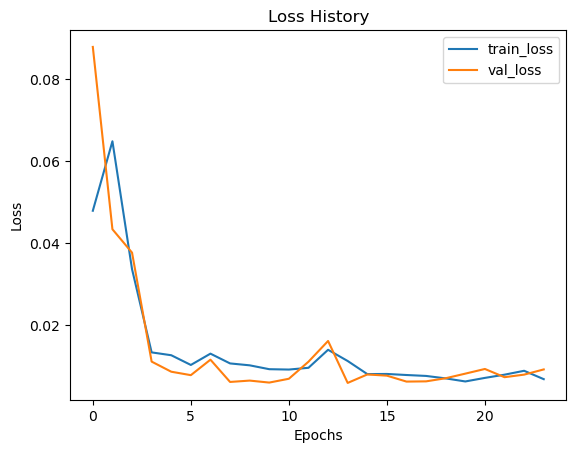

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

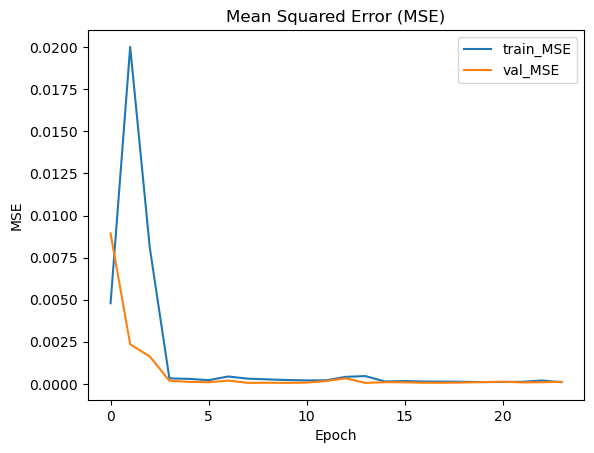

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

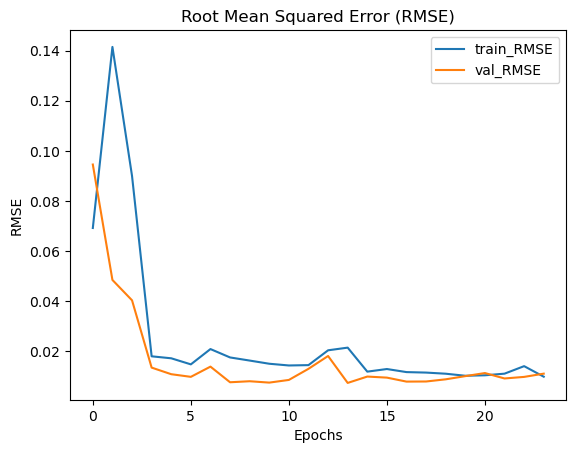

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

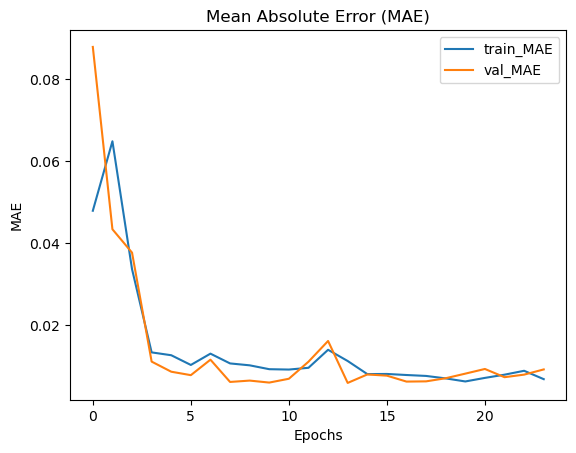

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

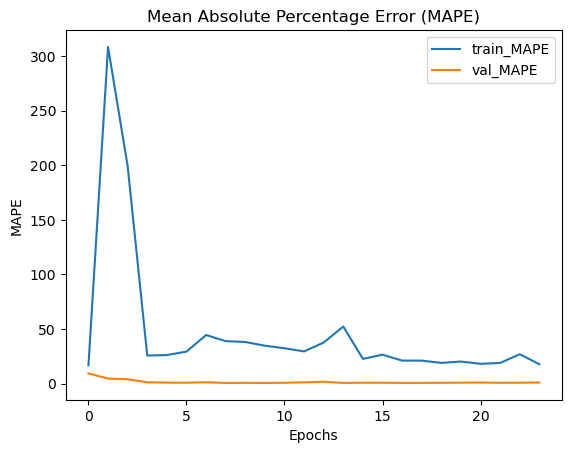

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:26:37.283342: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


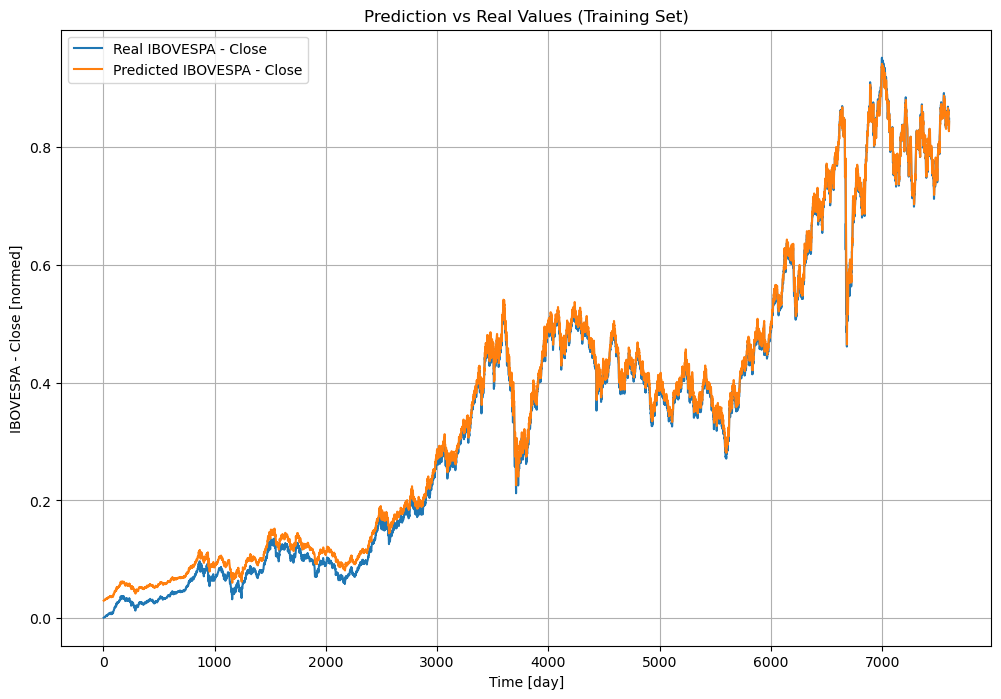

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


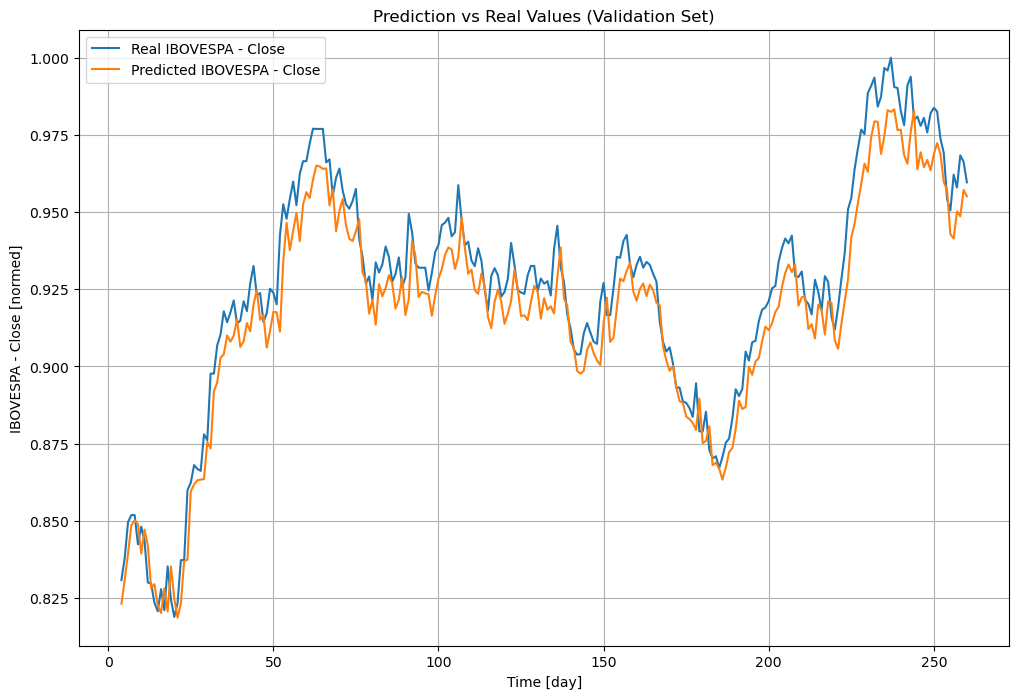

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


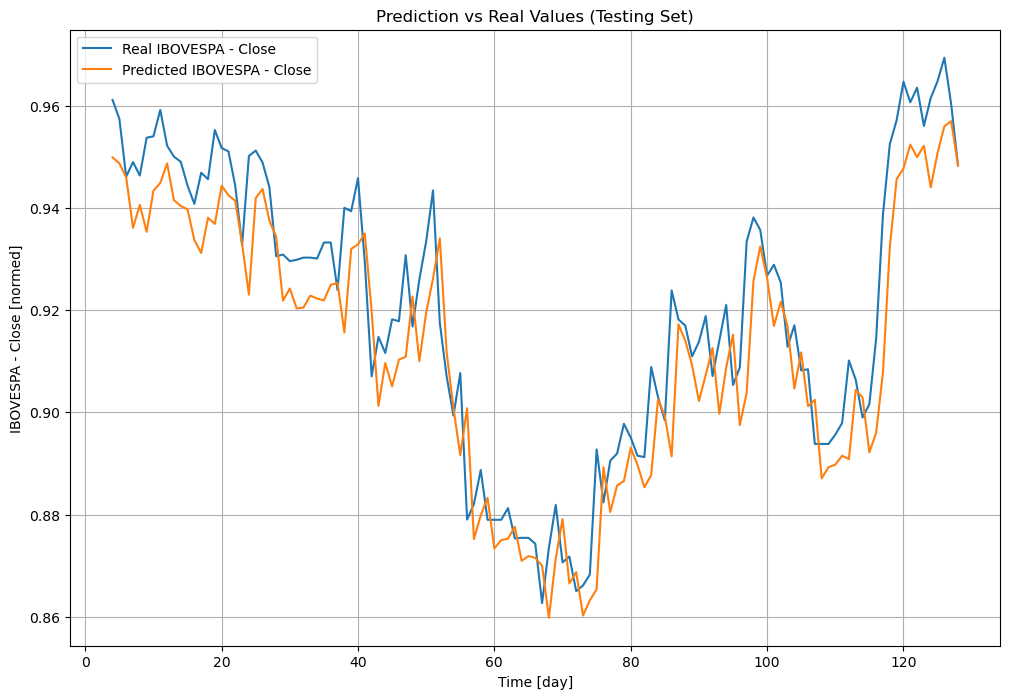

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

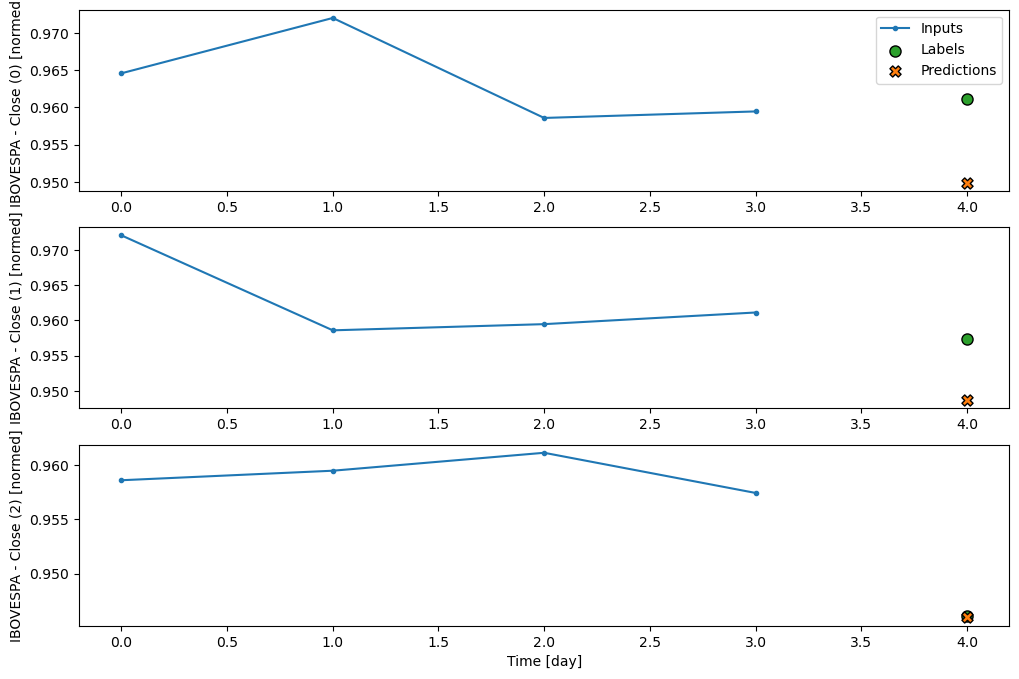

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:50s:676ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[[0.9498774 , 0.9498774 , 0.9498774 , ..., 0.9498774 ,
         0.9498774 , 0.9498774 ]],

       [[0.948704  , 0.948704  , 0.948704  , ..., 0.948704  ,
         0.948704  , 0.948704  ]],

       [[0.94596016, 0.94596016, 0.94596016, ..., 0.94596016,
         0.94596016, 0.94596016]],

       ...,

       [[0.9559486 , 0.9559486 , 0.9559486 , ..., 0.9559486 ,
         0.9559486 , 0.9559486 ]],

       [[0.95696306, 0.95696306, 0.95696306, ..., 0.95696306,
         0.95696306, 0.95696306]],

       [[0.9483398 , 0.9483398 , 0.9483398 , ..., 0.9483398 ,
         0.9483398 , 0.9483398 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')